# Rossmal sales Prediction

## Explanatory Data Analysis of Rossman sales 

In [1]:
### import neccessary libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# Import CSV Data into Pandas DataFrames

training_df = pd.read_csv("data/train.csv")
store_df = pd.read_csv("data/store.csv")
test_df = pd.read_csv("data/test.csv")

C:\Users\owner pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#checking what datas information
print(training_df.info())
print(test_df.info())
print(store_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 

In [4]:
#showing five top rows of train data
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
training_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
#showing five top rows of testing data
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
#showing five top rows of store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
### training index
training_df.index

RangeIndex(start=0, stop=1017209, step=1)

### Process Data

#### Training Data

In [11]:
#wow. no missing values.
training_df.isnull().all()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [12]:
opened_sales = (training_df[(training_df.Open == 1) & (training_df.Sales)]) #if the stores are opened and sales
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

In [18]:
plt.style.use("fivethirtyeight")
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])
f.tight_layout()
f.savefig("plot/Sales Distribution.png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()

In [19]:
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10,000")
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000")

Rossmann has 13.45 % of the time big sales, over 10,000
Rossmann has 0.0277 % of the time low sales, under 1000


#### Lets look at Customer

In [20]:
training_df.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [22]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

training_df.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
training_df.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])
f.tight_layout()
f.savefig("plot/Customer Distribution.png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()


In [23]:
#Seems to had a great sortiment on 22th of January 2013. They hit the record of customers. 
training_df[(training_df.Customers > 6000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [24]:
print("In 3 years, different stores where", training_df[(training_df.Open == 0)].count()[0], "times closed")
print("From this days,", training_df[(training_df.Open == 0) & 
         ((training_df.StateHoliday == "a") | 
         (training_df.StateHoliday == "b") | 
         (training_df.StateHoliday == "c"))].count()[0], "times the stores were closed because of holidays")
print(training_df[(training_df.Open == 0) & (training_df.SchoolHoliday == 1)].count()[0], "times, some stores were closed because of school holiday")
print("The stores were in some sundays opend ->", training_df[(training_df.Open == 1) & (training_df.DayOfWeek == 7)].count()[0], "times")
print("However,", training_df[(training_df.Open == 0) & ((training_df.StateHoliday == "0") | (training_df.StateHoliday == 0)) & (training_df.SchoolHoliday == 0)].count()[0], 
      "times, the stores were closed for no reason (No Holidays o Sunday)")

In 3 years, different stores where 172817 times closed
From this days, 30140 times the stores were closed because of holidays
18264 times, some stores were closed because of school holiday
The stores were in some sundays opend -> 3593 times
However, 139610 times, the stores were closed for no reason (No Holidays o Sunday)


#### Now lets take a look at StateHoliday Variable

In [25]:
# StateHoliday is not a continous number. 
training_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

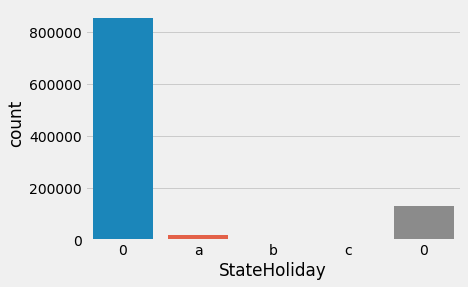

In [26]:
sns.countplot(training_df['StateHoliday'])
f.tight_layout()
f.savefig("plot/No.of StateHoliday.png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()

In [27]:
# "StateHoliday" has values "0" & 0
training_df["StateHoliday"].replace(0, '0', inplace= False)

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1017179    a
1017180    a
1017181    a
1017182    a
1017183    a
1017184    a
1017185    a
1017186    a
1017187    a
1017188    a
1017189    a
1017190    a
1017191    a
1017192    a
1017193    a
1017194    a
1017195    a
1017196    a
1017197    a
1017198    a
1017199    a
1017200    a
1017201    a
1017202    a
1017203    a
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 1017209, dtype: object

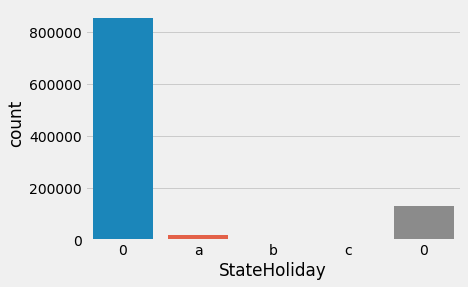

In [28]:
#StateHoliday Count plot
sns.countplot(training_df['StateHoliday'])
f.tight_layout()
f.savefig("plot/No.of StateHoliday.png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()

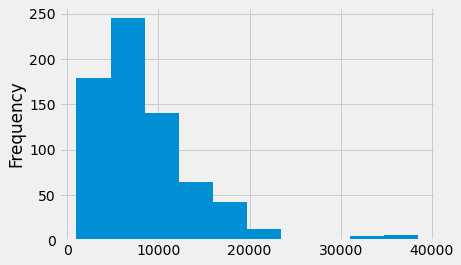

In [21]:
#Relation ship between public holiday and open stores with their sales
training_df[(training_df['StateHoliday'] == 'a') & (training_df['Open'] == 1)]["Sales"].plot(kind="hist")

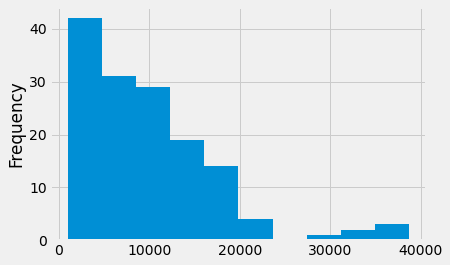

In [22]:
#Relation ship between easter holiday and open stores with their sales
training_df[(training_df['StateHoliday'] == 'b') & (training_df['Open'] == 1)]["Sales"].plot(kind="hist")

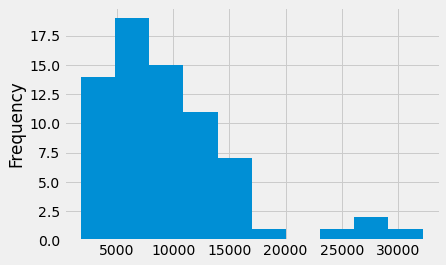

In [23]:
#Relation ship between Christmas and open stores with their sales
training_df[(training_df['StateHoliday'] == 'c') & (training_df['Open'] == 1)]["Sales"].plot(kind="hist")

In [30]:
# "StateHoliday" has values "0" & 0
opened_sales.loc[:, "StateHoliday"]= opened_sales["StateHoliday"].replace(0, '0')
opened_sales.groupby('StateHoliday')['Sales'].sum()

C:\Users\owner pc\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


StateHoliday
0    2931526498
a       3159753
b        733750
c        366284
Name: Sales, dtype: int64

In [31]:
# Create "Year", "Month" & "DayOfMonth" columns
training_df['Date']= pd.to_datetime(training_df['Date'], format= "%Y-%m-%d")
training_df["Year"] = training_df["Date"].apply(lambda x: x.year)
training_df["Month"] = training_df["Date"].apply(lambda x: x.month)
training_df["DayOfMonth"] = training_df["Date"].apply(lambda x: x.day)

In [32]:
# adding sales per customer new variable
training_df['SalePerCustomer'] = training_df['Sales']/training_df['Customers']
training_df['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [33]:
# Create "StateHolidayBinary" column
training_df["StateHolidayBinary"] = training_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

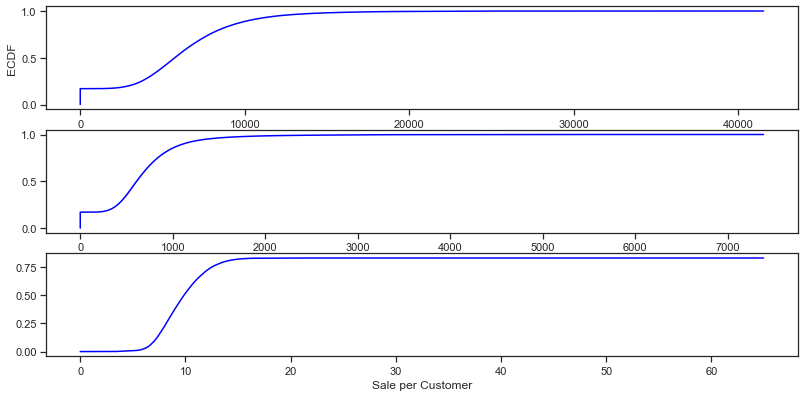

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set(style = "ticks") 

plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(training_df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = "blue");
plt.xlabel('Sales'); plt.ylabel('ECDF');

  
plt.subplot(312)
cdf = ECDF(training_df['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = "blue");
plt.xlabel('Customers');

  
plt.subplot(313)
cdf = ECDF(training_df['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = "blue");
plt.xlabel('Sale per Customer');

f.tight_layout()
f.savefig("plot/Sales per Customer.png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()

In [35]:
# closed stores
training_df[(training_df.Open == 0) & (training_df.Sales == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,SalePerCustomer,StateHolidayBinary
291,292,5,2015-07-31,0,0,0,1,0,1,2015,7,31,NaN,0
875,876,5,2015-07-31,0,0,0,1,0,1,2015,7,31,NaN,0
1406,292,4,2015-07-30,0,0,0,1,0,1,2015,7,30,NaN,0
1990,876,4,2015-07-30,0,0,0,1,0,1,2015,7,30,NaN,0
2521,292,3,2015-07-29,0,0,0,1,0,1,2015,7,29,NaN,0


In [36]:
# opened stores with zero sales
zero_sales = training_df[(training_df.Open != 0) & (training_df.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 14)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,SalePerCustomer,StateHolidayBinary
86825,971,5,2015-05-15,0,0,1,0,0,1,2015,5,15,NaN,0
142278,674,4,2015-03-26,0,0,1,0,0,0,2015,3,26,NaN,0
196938,699,4,2015-02-05,0,0,1,1,0,0,2015,2,5,NaN,0
322053,708,3,2014-10-01,0,0,1,1,0,0,2014,10,1,NaN,0
330176,357,1,2014-09-22,0,0,1,0,0,0,2014,9,22,NaN,0


In [37]:
print("Open stores and days which had sales ")
training_df = training_df[(training_df["Open"] != 0) & (training_df['Sales'] != 0)]

print("In total: ", training_df.shape)

Open stores and days which had sales 
In total:  (844338, 14)


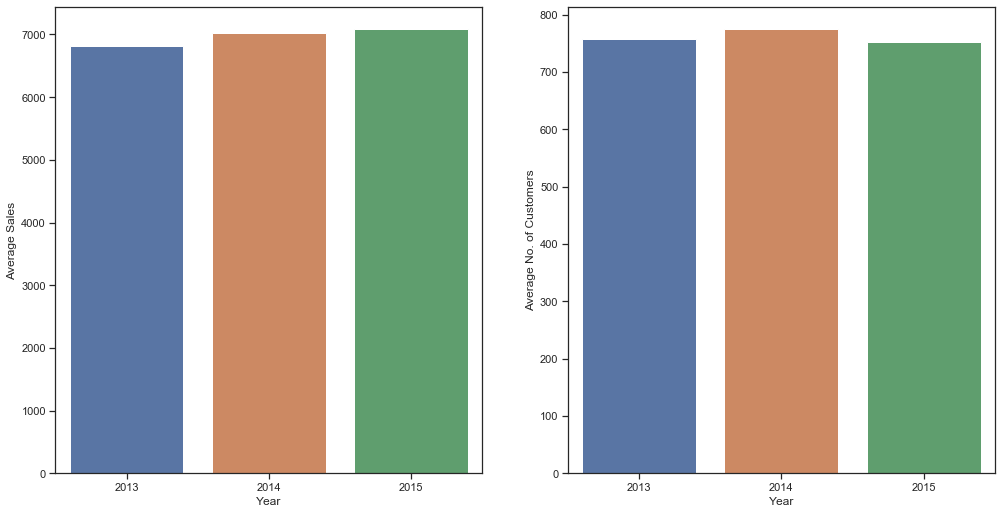

Plotted Avg. Sales & Customers (by Year)


In [38]:
# Generate plots for Avg. Sales & Customers (by Year)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.barplot(x="Year", y="Sales", data=training_df, ax=axis1, ci=None)
ax2 = sns.barplot(x="Year", y="Customers", data=training_df, ax=axis2, ci=None)
ax1.set(xlabel="Year", ylabel="Average Sales")
ax2.set(xlabel="Year", ylabel="Average No. of Customers")
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by Year).png", dpi=f.dpi)
f.clf()
plt.close(f)
plt.show()
print("Plotted Avg. Sales & Customers (by Year)")

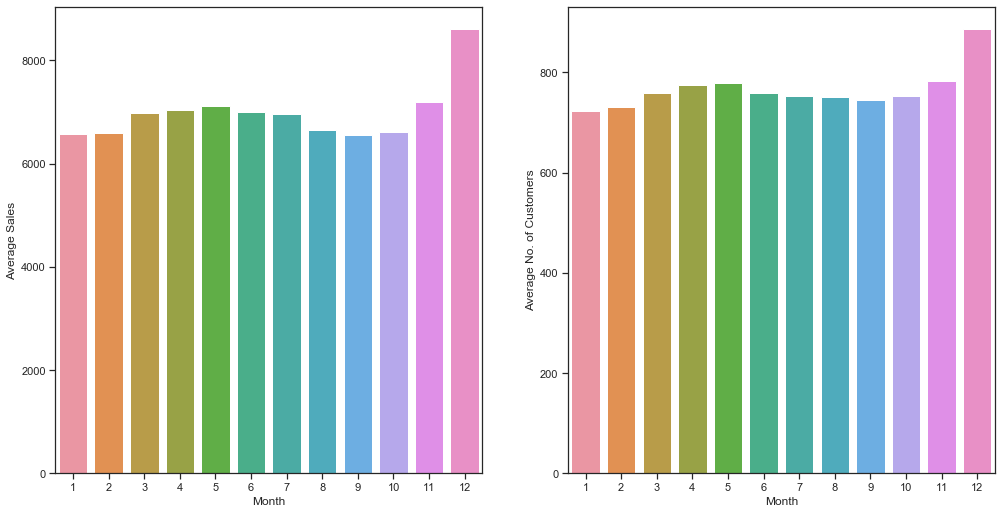

Plotted Avg. Sales & Customers (by Month)


In [78]:
# Generate plots for Avg. Sales & Customers (by Month)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.barplot(x="Month", y="Sales", data=training_df, ax=axis1, ci=None)
ax2 = sns.barplot(x="Month", y="Customers", data=training_df, ax=axis2, ci=None)
ax1.set(xlabel="Month", ylabel="Average Sales")
ax2.set(xlabel="Month", ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by Month).png", dpi=f.dpi)
f.clf()

plt.close(f)
print("Plotted Avg. Sales & Customers (by Month)")

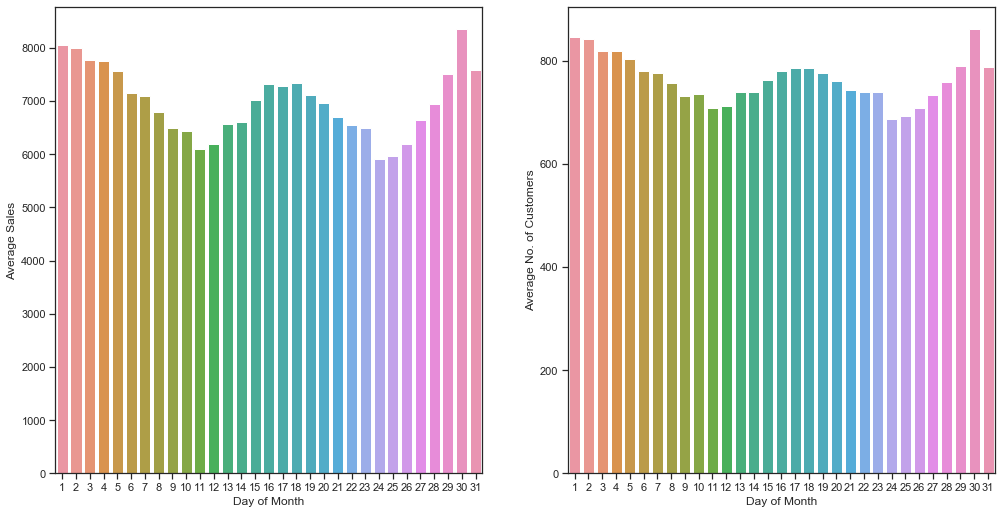

Plotted Avg. Sales & Customers (by Day Of Month)


In [76]:
# Generate plots for Avg. Sales & Customers (by Day of Month)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.barplot(x="DayOfMonth", y="Sales", data=training_df, ax=axis1, ci=None)
ax2 = sns.barplot(x="DayOfMonth", y="Customers", data=training_df, ax=axis2, ci=None)
ax1.set(xlabel="Day of Month", ylabel="Average Sales")
ax2.set(xlabel="Day of Month", ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by Day of Month).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Avg. Sales & Customers (by Day Of Month)")

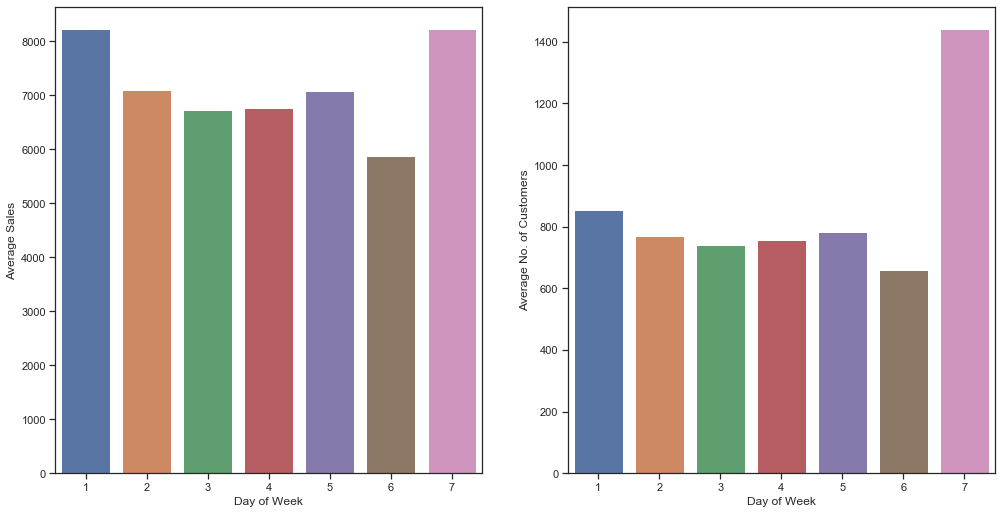

Plotted Avg. Sales & Customers (by Day of Week)


In [77]:
# Generate plots for Avg. Sales & Customers (by Day of Week)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.barplot(x="DayOfWeek", y="Sales", data=training_df, order=[1, 2, 3, 4, 5, 6, 7], ax=axis1, ci=None)
ax2 = sns.barplot(x="DayOfWeek", y="Customers", data=training_df, order=[1, 2, 3, 4, 5, 6, 7], ax=axis2, ci=None)
ax1.set(xlabel="Day of Week", ylabel="Average Sales")
ax2.set(xlabel="Day of Week", ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by Day of Week).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Avg. Sales & Customers (by Day of Week)")

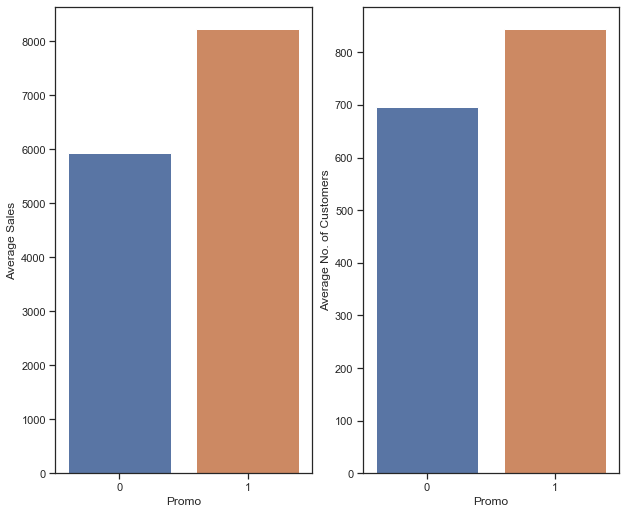

Plotted Avg. Sales & Customers (by Promo)


In [79]:
# Generate plots for Avg. Sales & Customers (by Promo)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(9, 8))
ax1 = sns.barplot(x="Promo", y="Sales", data=training_df, ax=axis1, ci=None)
ax2 = sns.barplot(x="Promo", y="Customers", data=training_df, ax=axis2, ci=None)
ax1.set(ylabel="Average Sales")
ax2.set(ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by Promo).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Avg. Sales & Customers (by Promo)")

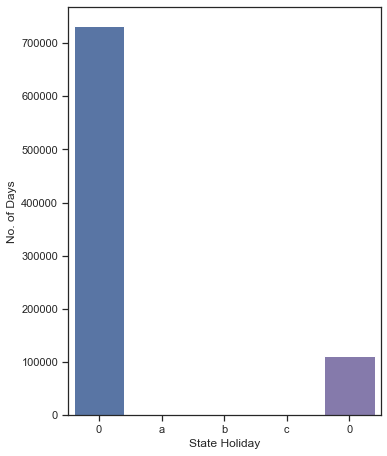

Plotted No. of State Holidays


In [80]:
# Generate plot for No. of State Holidays
f, (axis1) = plt.subplots(1, 1, figsize=(5, 7))
ax = sns.countplot(x="StateHoliday", data=training_df)
ax.set(xlabel="State Holiday", ylabel="No. of Days")
plt.show()
f.tight_layout()
f.savefig("plot/No. of State Holidays.png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted No. of State Holidays")

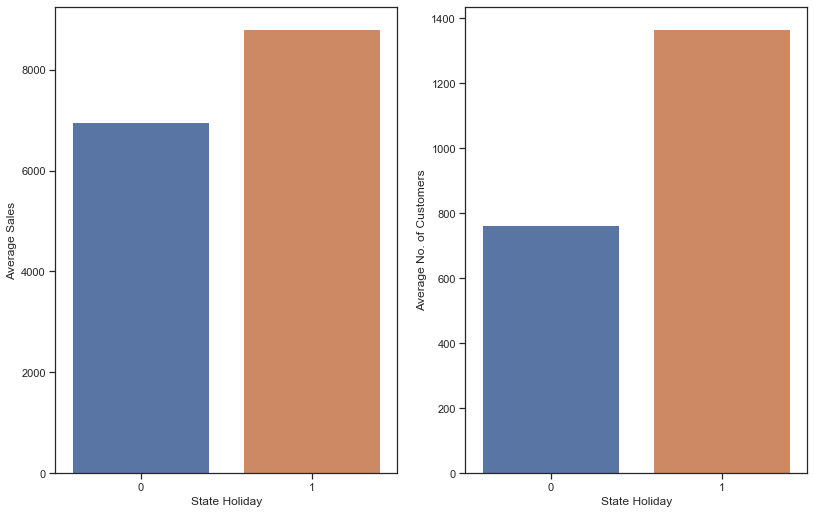

Plotted Avg. Sales & Customers (by State Holiday Binary)


In [81]:
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 8))
ax1 = sns.barplot(x="StateHolidayBinary", y="Sales", data=training_df, ax=axis1, ci=None)
ax2 = sns.barplot(x="StateHolidayBinary", y="Customers", data=training_df, ax=axis2, ci=None)
ax1.set(xlabel="State Holiday", ylabel="Average Sales")
ax2.set(xlabel="State Holiday", ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by State Holiday Binary).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Avg. Sales & Customers (by State Holiday Binary)")

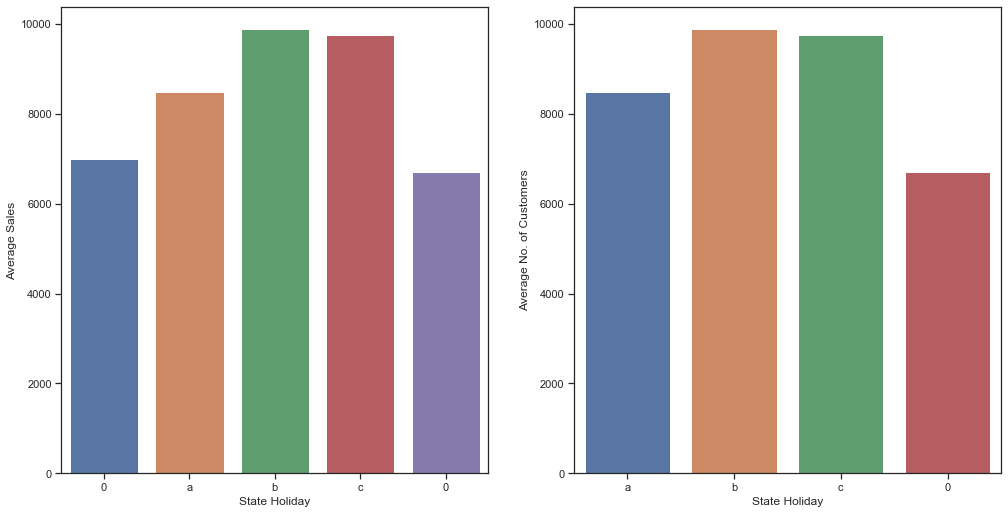

Plotted Avg. Sales & Customers (by State Holiday)


In [82]:
# Generate plots for Avg. Sales & Customers (by State Holiday)
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.barplot(x="StateHoliday", y="Sales", data=training_df, ax=axis1, ci=None)
mask = (training_df["StateHoliday"] != "0") & (training_df["Sales"] > 0)
ax2 = sns.barplot(x="StateHoliday", y="Sales", data=training_df[mask], ax=axis2, ci=None)
ax1.set(xlabel="State Holiday", ylabel="Average Sales")
ax2.set(xlabel="State Holiday", ylabel="Average No. of Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Avg. Sales & Customers (by State Holiday).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Avg. Sales & Customers (by State Holiday)")

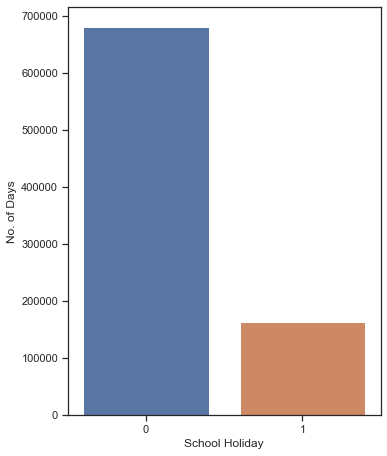

Plotted No. of School Holidays


In [48]:
# Generate plot for No. of School Holidays
fig, (axis1) = plt.subplots(1, 1, figsize=(5, 7))
ax = sns.countplot(x="SchoolHoliday", data=training_df)
ax.set(xlabel="School Holiday", ylabel="No. of Days")
plt.show()
f.tight_layout()
f.savefig("plot/No. of School Holidays.png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted No. of School Holidays")

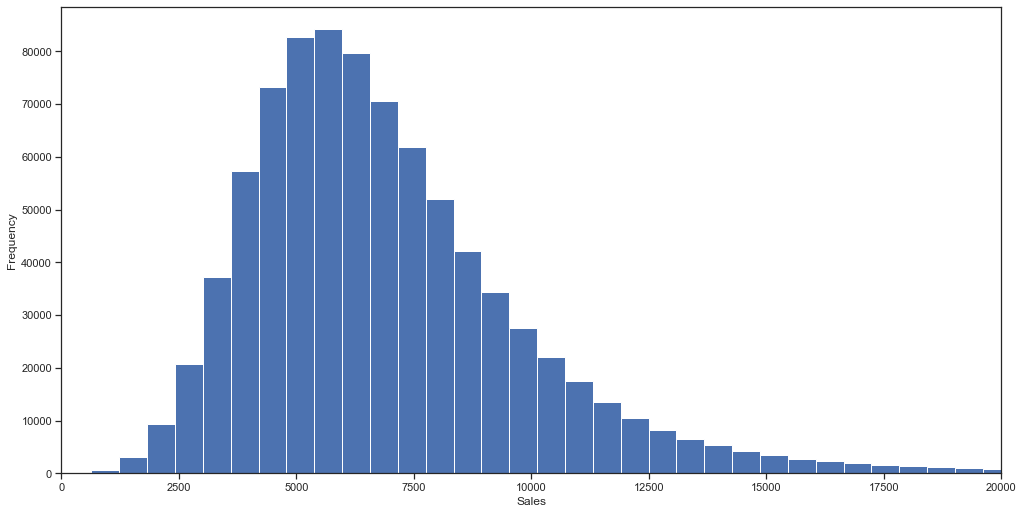

Plotted Frequency of Sales Values


In [49]:
# Generate plot for Frequency of Sales Values
f, (axis1) = plt.subplots(1, 1, figsize=(15, 8))
ax = training_df["Sales"].plot(kind="hist", bins=70, xlim=(0, 20000), ax=axis1)
ax.set(xlabel="Sales")
plt.show()
f.tight_layout()
f.savefig("plot/Frequency of Sales Values.png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Frequency of Sales Values")

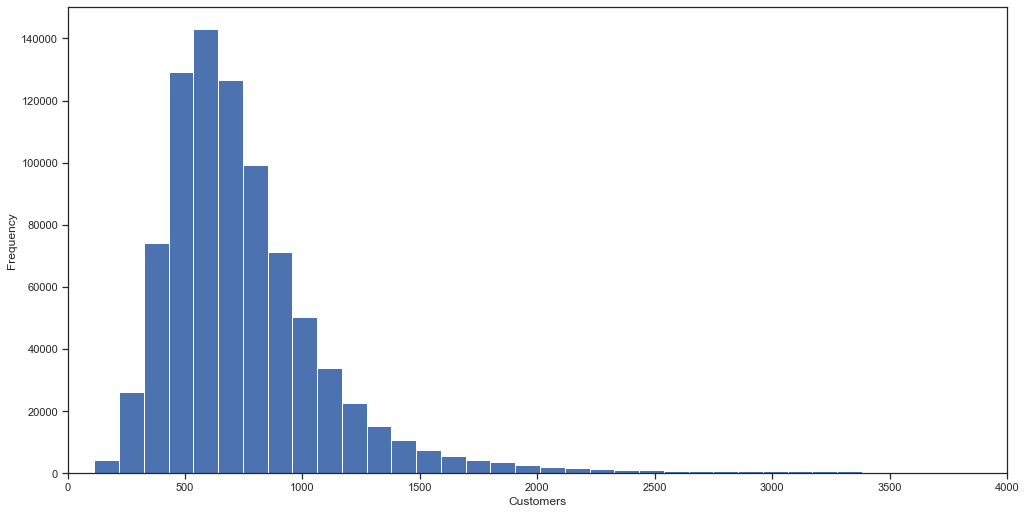

Plotted Frequency of Customers Values


In [50]:
# Generate plot for Frequency of Customers Values
f, (axis1) = plt.subplots(1, 1, figsize=(15, 8))
ax = training_df["Customers"].plot(kind="hist", bins=70, xlim=(0, 4000), ax=axis1)
ax.set(xlabel="Customers")
plt.show()
f.tight_layout()
f.savefig("plot/Frequency of Customers Values", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted Frequency of Customers Values")

#### Store Data

In [51]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [52]:
# missing values in CompetitionDistance
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


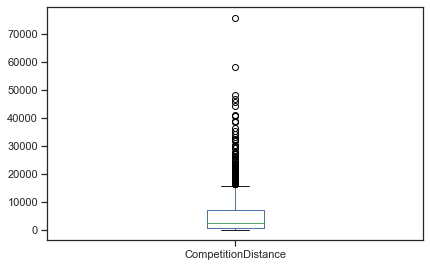

the median is 2325.0 and mean is 5404.901079136691


In [54]:
store_df.CompetitionDistance.plot.box() #let me see the outliers, so we can choose between mean and median to fill the NaNs
plt.show()
f.tight_layout()
f.savefig("plot/Box Plot of Competion Distance.png", dpi=f.dpi)
f.clf()
plt.close(f)
print("the median is", store_df.CompetitionDistance.median(), "and mean is", store_df.CompetitionDistance.mean())

In [55]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [56]:
_ = store_df[pd.isnull(store_df.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [57]:
# replace NA's by 0
store_df.fillna(0, inplace = True)

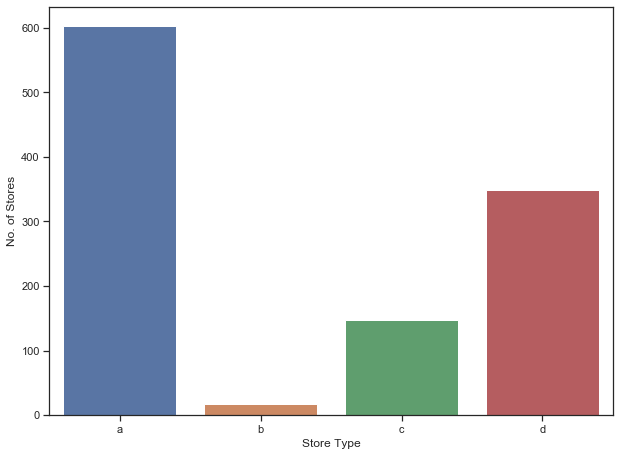

Plotted No. Of Stores (by Store Type)


In [58]:
# Generate plot for No. Of Stores (by Store Type)
f, (axis1) = plt.subplots(1, 1, figsize=(9, 7))
ax = sns.countplot(x="StoreType", data=store_df, order=["a", "b", "c", "d"])
ax.set(xlabel="Store Type", ylabel="No. of Stores")
plt.show()
f.tight_layout()
f.savefig("plot/No. Of Stores (by Store Type).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted No. Of Stores (by Store Type)")


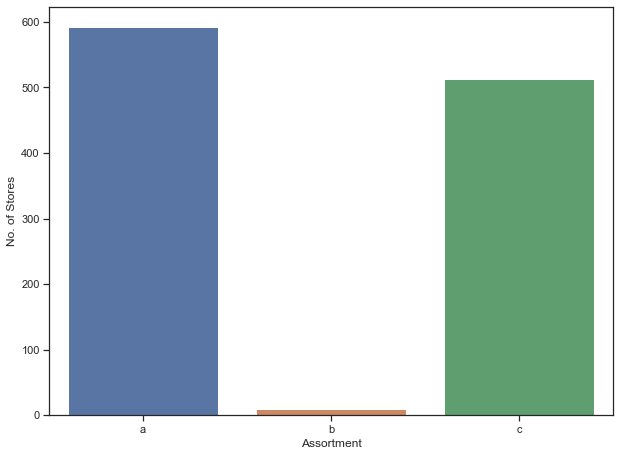

Plotted No. Of Stores (by Assortment)


In [83]:
# Generate plot for No. Of Stores (by Assortment)
f, (axis1) = plt.subplots(1, 1, figsize=(9, 7))
ax = sns.countplot(x="Assortment", data=store_df, order=["a", "b", "c"])
ax.set(ylabel="No. of Stores")
plt.show()
f.tight_layout()
f.savefig("plot/No. Of Stores (by Assortment).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted No. Of Stores (by Assortment)")

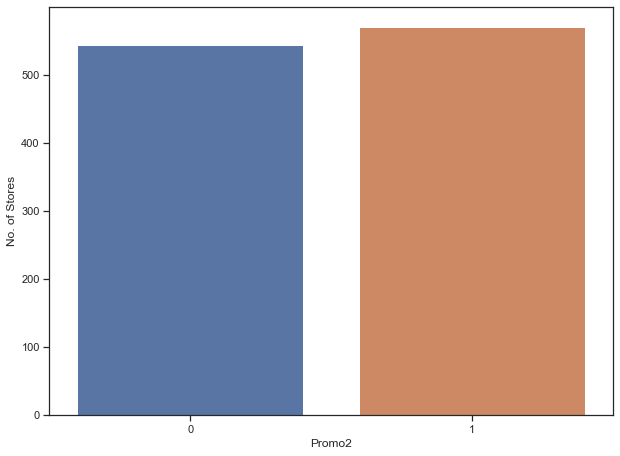

Plotted No. Of Stores (by Promo2)


In [84]:
# Generate plot for No. Of Stores (by Promo2)
f, (axis1) = plt.subplots(1, 1, figsize=(9, 7))
ax = sns.countplot(x="Promo2", data=store_df)
ax.set(ylabel="No. of Stores")
plt.show()
f.tight_layout()
f.savefig("plot/No. Of Stores (by Promo2).png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted No. Of Stores (by Promo2)")

In [60]:
print("Joining train set with an additional store information.")


train_store = pd.merge(training_df, store_df, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 23)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StateHolidayBinary,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [61]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [62]:
train_store.pivot_table(index= 'StoreType', values= ['Customers', 'Sales'], aggfunc='sum')

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


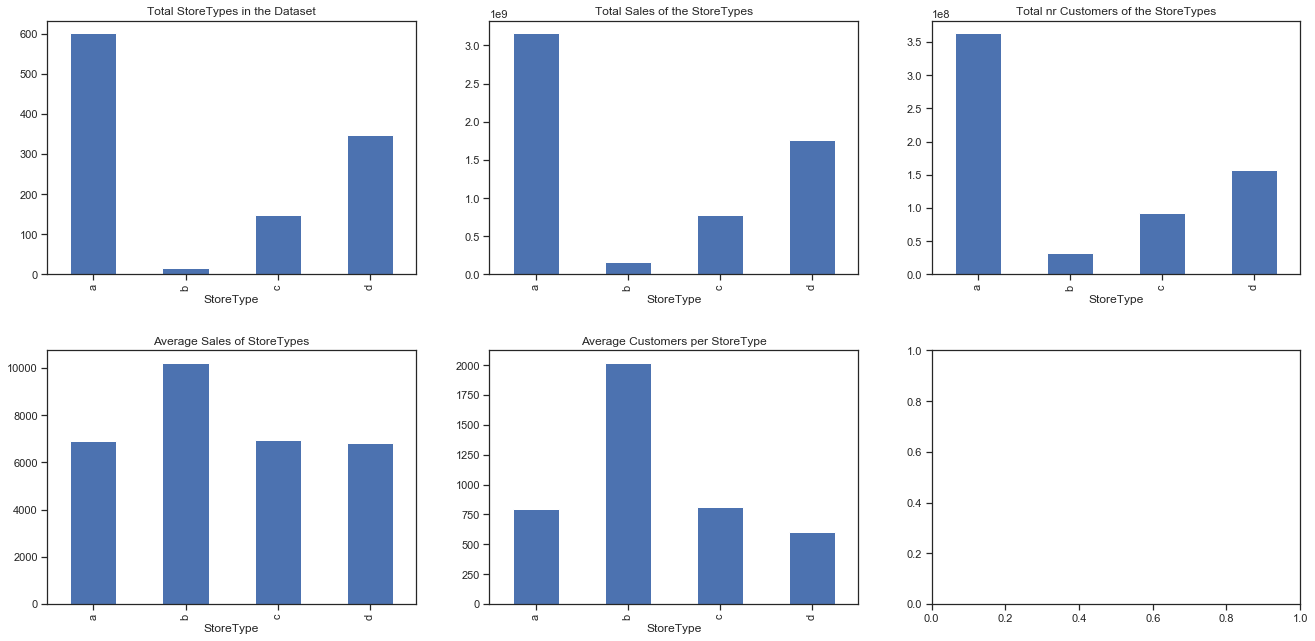

In [63]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train_store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train_store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train_store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train_store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.tight_layout()
f.savefig("plot/All variables(by StoreTypes).png", dpi=f.dpi)
f.clf()
plt.close(f)

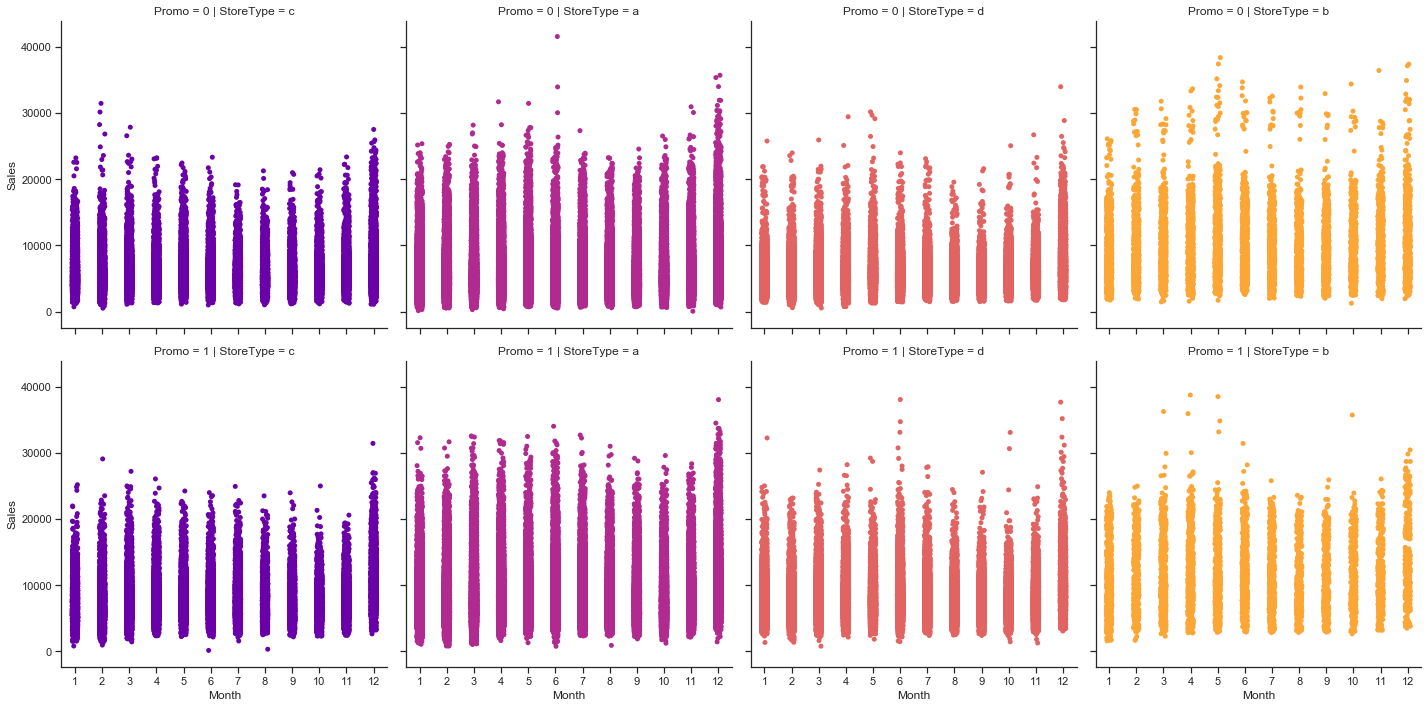

In [86]:

sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = "blue")
plt.show()
f.tight_layout()
f.savefig("plot/Sales (by Month) with promo and store_type.png", dpi=f.dpi)
f.clf()
plt.close(f)

C:\Users\owner pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


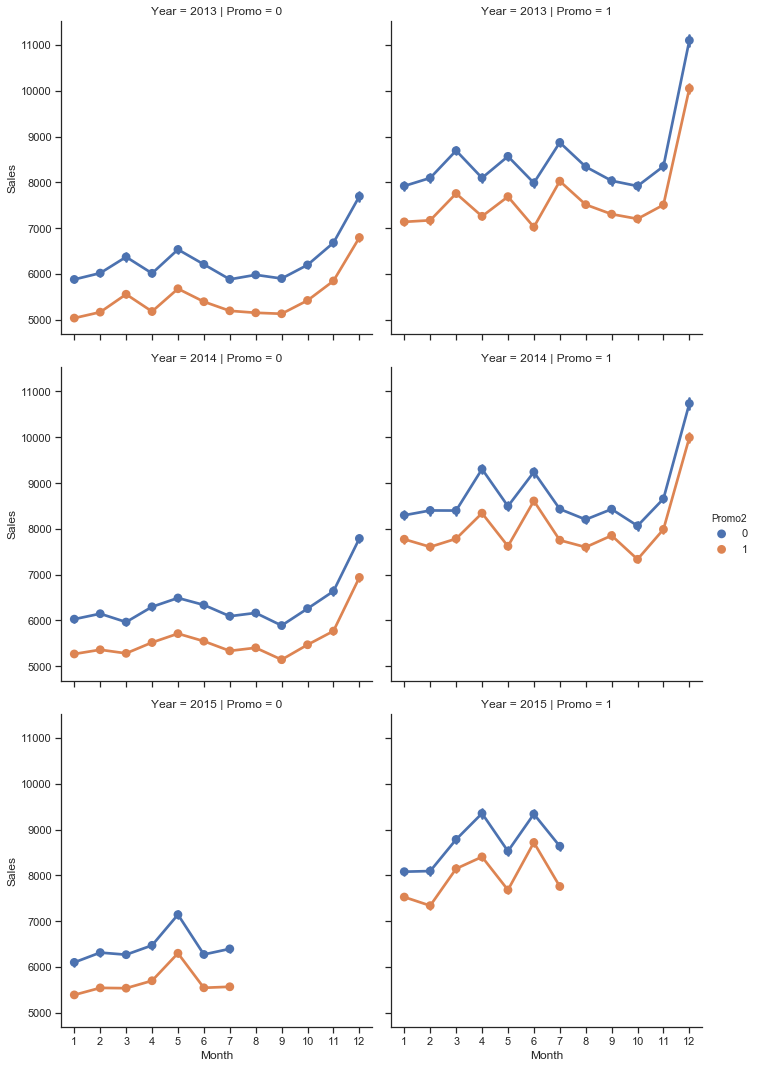

In [65]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
plt.show()
f.tight_layout()
f.savefig("plot/Sales vs Month(By Year and Promo,Promo2).png", dpi=f.dpi)
f.clf()
plt.close(f)
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

C:\Users\owner pc\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


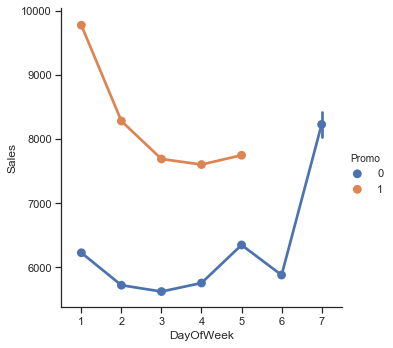

In [66]:
sns.factorplot(data = train_store, x = "DayOfWeek", y = "Sales", hue = "Promo")
plt.show()
f.tight_layout()
f.savefig("plot/Promo Sales by Day of Week).png", dpi=f.dpi)
f.clf()
plt.close(f)

In [67]:
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

In [68]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'SalePerCustomer', 'StateHolidayBinary', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

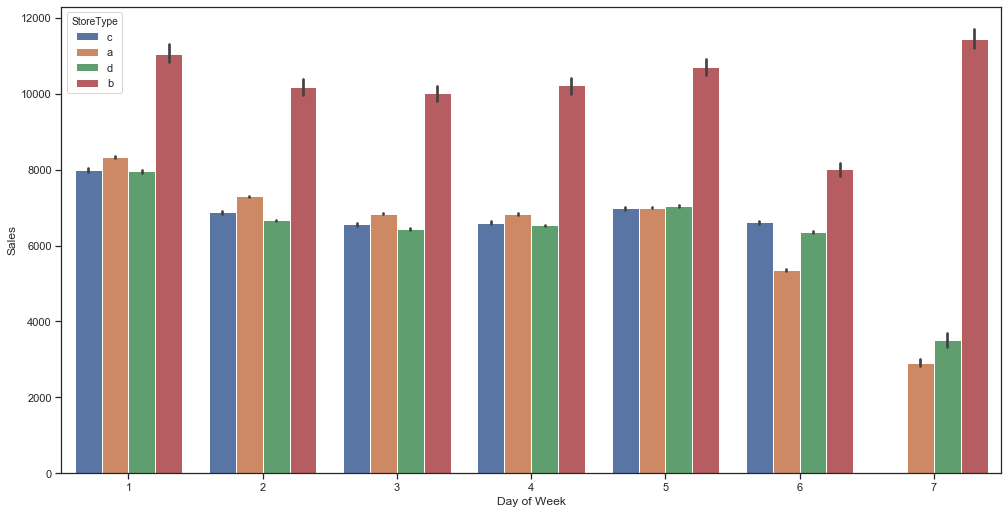

Plotted store type sales in day of week)


In [87]:
# Generate plot for stores are sales on day of week by their store type.
f, ax = plt.subplots(1,1,figsize = (15, 8))
ax = sns.barplot(x="DayOfWeek",y="Sales", hue="StoreType", data=train_store)
ax.set(xlabel="Day of Week", ylabel="Sales")
plt.show()
f.tight_layout()
f.savefig("plot/Store type sales in day of week.png", dpi=f.dpi)
f.clf()
plt.close(f)
print("Plotted store type sales in day of week)")

As we can see from above plot store type `c` doesnt work on sunday on which more sales happen. Store type `b` has more average sales than other stores.

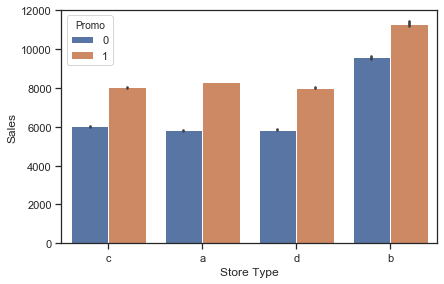

In [70]:
#Plotting relationship between Store type and sales when there is promo and no promo
sns.barplot(x="StoreType", y='Sales',hue="Promo",data=train_store)
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.show()
f.tight_layout()
f.savefig("plot/Store type sales with promo.png", dpi=f.dpi)
f.clf()
plt.close(f)
#plt.legend("Store type vs Sales when there is promo")

In [71]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
train_store.fillna(0, inplace = True)

train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,CompetitionOpen
StoreType,,,
a,6925.697986,795.422370,7115.514452
b,10233.380141,2022.211825,11364.495244
c,6933.126425,815.538073,6745.418694
d,6822.300064,606.353935,9028.526526


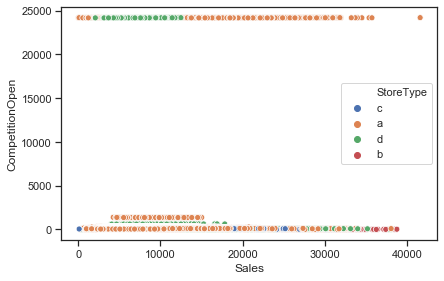

In [72]:
#Effect of Open competitor on sales by store type
sns.scatterplot(x='Sales',y='CompetitionOpen', hue="StoreType",data=train_store)

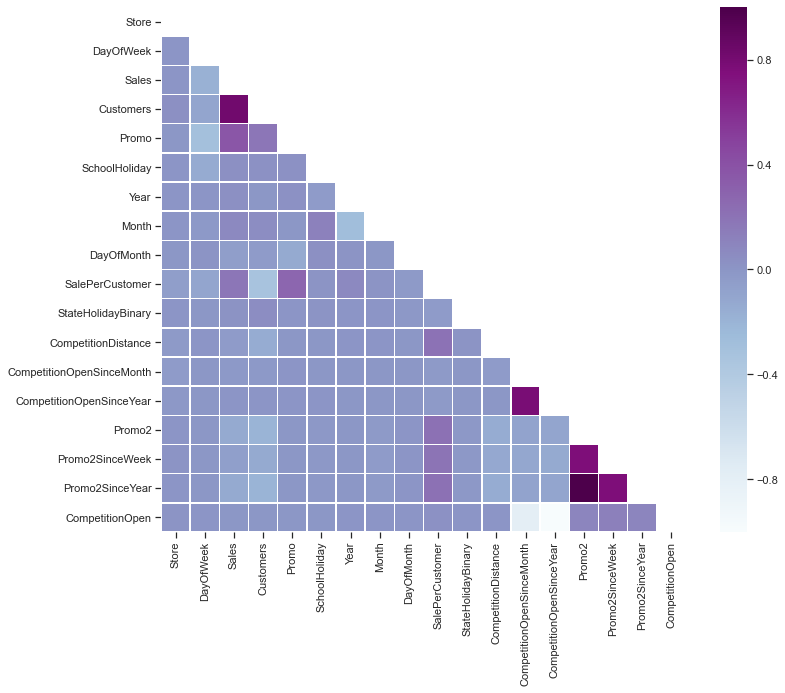

In [65]:
# Compute the correlation matrix 

corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu") 
plt.show()
f.tight_layout()
f.savefig("plot/Correlation Matrix.png", dpi=f.dpi)
f.clf()
plt.close(f)

### My conclusion of the analysis

* StoreType A has the most sells and customers.
* StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.
* StoreTybe D had the highest buyer cart.
* Promo runs only in weekdays.
* Promo2 doesnt seems to be correlated to any significant change in the sales amount.
* Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all.
* At this point, I dont see any yearly trends. Only seasonal patterns.

In [65]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0


## Preprocess for model

### Training Set

In [129]:
#function that change catagorical data to numerical data
def one_hot(data):
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)

In [68]:
#calling one hot function on train store
one_hot(train_store)

In [69]:
train_store.Date = pd.to_datetime(train_store.Date)
#get week of a year from date
train_store['WeekOfYear'] = train_store.Date.dt.weekofyear

In [70]:
# Drop "Date"
#train_store.drop(["Date"], axis=1, inplace=True)

In [71]:
#merging to competion open to month and promo2 open to month
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + (train_store.Month - train_store.CompetitionOpenSinceMonth)
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

In [72]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'SalePerCustomer', 'StateHolidayBinary', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen'],
      dtype='object')

In [73]:
# dropping column that we dont use in the model
train_store.drop(columns= ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2SinceYear','Promo2SinceWeek'], inplace= True)

In [74]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'SalePerCustomer', 'StateHolidayBinary', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'CompetitionOpen',
       'WeekOfYear', 'PromoOpen'],
      dtype='object')

### Selecting necessary featues for training

In [75]:
features = ["Store",'DayOfWeek','Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2',
       'CompetitionOpen', 'PromoOpen']

train_store[features].head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen,PromoOpen
0,1,5,1,0,1,2015,7,31,3,1,1270.0,0,82.0,24187.75
1,1,4,1,0,1,2015,7,30,3,1,1270.0,0,82.0,24187.75
2,1,3,1,0,1,2015,7,29,3,1,1270.0,0,82.0,24187.75
3,1,2,1,0,1,2015,7,28,3,1,1270.0,0,82.0,24187.75
4,1,1,1,0,1,2015,7,27,3,1,1270.0,0,82.0,24187.75


## Test Set

In [76]:
test_df["Date"]= pd.to_datetime(test_df["Date"], format= '%Y-%m-%d')
test_df['Year']= test_df["Date"].apply(lambda x: x.year)
test_df['Month']= test_df["Date"].apply(lambda x: x.month)
test_df['DayOfMonth']= test_df["Date"].apply(lambda x: x.day)

In [77]:
print("Joining train set with an additional store information.")
test_store = pd.merge(test_df, store_df, how = 'inner', on = 'Store')
print("In total: ", test_store.shape)
test_store.head()

Joining train set with an additional store information.
In total:  (41088, 20)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,2015,9,16,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,2015,9,15,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,2015,9,14,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,2015,9,13,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [78]:
#calling one hot function on test store
one_hot(test_store)

In [79]:
test_store.Date = pd.to_datetime(test_store.Date)
#get week of a year from date
test_store['WeekOfYear'] = test_store.Date.dt.weekofyear

In [80]:
#merging to competion open to month and promo2 open to month
test_store['CompetitionOpen'] = 12 * (test_store.Year - test_store.CompetitionOpenSinceYear) + (test_store.Month - test_store.CompetitionOpenSinceMonth)
test_store['PromoOpen'] = 12 * (test_store.Year - test_store.Promo2SinceYear) + (test_store.WeekOfYear - test_store.Promo2SinceWeek) / 4.0

In [81]:
test_store.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'DayOfMonth', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'WeekOfYear', 'CompetitionOpen',
       'PromoOpen'],
      dtype='object')

In [82]:
# Drop unwanted columns or catagorical columns 
test_store.drop(["Date","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","WeekOfYear",
                 "Promo2SinceYear","Promo2SinceWeek","PromoInterval"], axis=1, inplace=True)

In [83]:
# Drop "Open" from test_df
test_store.drop(['Open'],axis=1,inplace=True)

In [84]:
test_store.columns

Index(['Id', 'Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Year', 'Month', 'DayOfMonth', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'CompetitionOpen', 'PromoOpen'],
      dtype='object')

In [169]:
train_store.to_csv("data/test_store.csv")

## Random Forest Regression

**Let's go ahead and develop the Model**

I will use now only the training Dataset

In [85]:
from sklearn import model_selection
from sklearn import metrics

features = train_store[features]
target = train_store['Sales']

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# I call here train_test_set which is  divided 80% and 20% validation
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675470, 14) (168868, 14) (675470,) (168868,)


## Training dataset

In [86]:
X_train.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,StoreType,Assortment,CompetitionDistance,Promo2,WeekOfYear,CompetitionOpen,PromoOpen
269257,358,5,0,0,0,2015,6,12,1,1,2890.0,0,24,140.0,24186.00
455406,602,2,0,0,0,2014,1,14,1,1,2710.0,1,3,150.0,19.25
353418,468,4,1,0,0,2015,1,29,3,3,5260.0,0,5,28.0,24181.25
425917,563,2,1,0,0,2013,2,19,1,1,700.0,1,8,-25.0,-12.50
180387,240,3,1,0,0,2013,1,9,1,1,1110.0,0,2,44.0,24156.50


In [87]:
y_train.head()

269257    8967
455406    5228
353418    5662
425917    5470
180387    5044
Name: Sales, dtype: int64

#### Training model

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, y_train)
yhat = rfr.predict(X_train_test)
rms_rfr = sqrt(mean_squared_error(y_train_test, yhat))
print("RMS:", rms_rfr)

RMS: 988.7569125265082


In [86]:
#train real model
from sklearn.ensemble import RandomForestRegressor
X_train = features
y_train = target
rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Model accuracy

In [89]:
rfr.score(X_train_test, yhat)

1.0

In order to understand better what happened when we ran our randomforest regressor, here is a chart that represents, the importance and role that each variable that i decided to include played in this learning process:

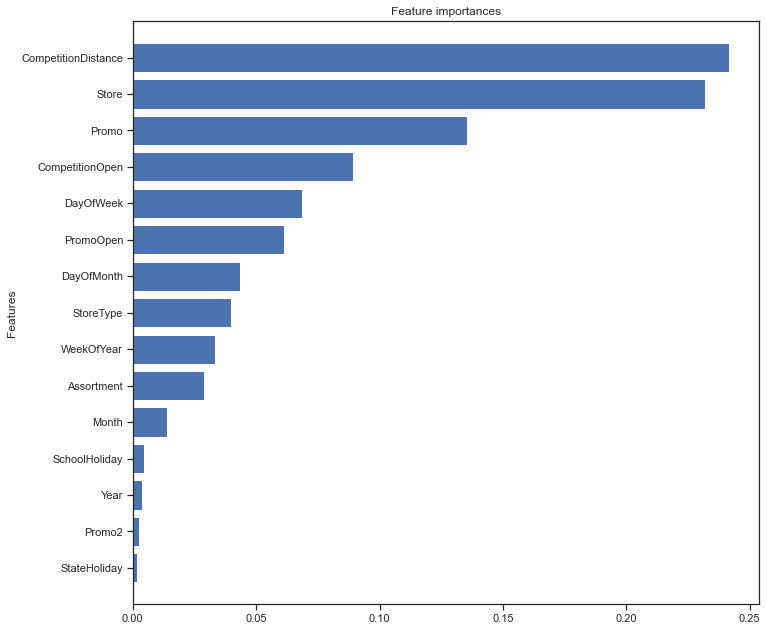

In [90]:
import itertools
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [91]:
# # Try different numbers of n_estimators - this will take a minute or so
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1)
# estimators = np.arange(10, 200, 10)
# scores = []
# for n in estimators:
#     model.set_params(n_estimators=n)
#     model.fit(X_train, y_train)
#     scores.append(model.score(X_train_test, y_train_test))
# plt.title("Effect of n_estimators")
# plt.xlabel("n_estimator")
# plt.ylabel("score")
# plt.plot(estimators, scores)

In [92]:
# #another script that takes toooo long, to find the right parameters for RFR
# params = {'max_depth':(4,6,8,10,12,14,16,20),
#           'n_estimators':(4,8,16,24,48,72,96,128),
#           'min_samples_split':(2,4,6,8,10)}
# #scoring_fnc = metrics.make_scorer(rmspe)
# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV 
# # is a better option then GridSearchCV
# grid = model_selection.RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=10) 
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.(takes time to run but is worth doing it)
# grid.fit(X_train, y_train)

In [100]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [110]:
ts_prophet = train_store[['Date','SchoolHoliday','StateHoliday','Sales']]
ts_prophet.head()

,Date,SchoolHoliday,StateHoliday,Sales
0,2015-07-31,1,0,5263
1,2015-07-30,1,0,5020
2,2015-07-29,1,0,4782
3,2015-07-28,1,0,5011
4,2015-07-27,1,0,6102


In [111]:
# as I understand from the documentation, the variables should have a specific names
ts_prophet = ts_prophet.rename(columns = {"Date": "ds",
                          "Sales": "y"})

ts_prophet.tail()

,ds,SchoolHoliday,StateHoliday,y
844333,2013-01-07,0,0,9291
844334,2013-01-05,0,0,2748
844335,2013-01-04,1,0,4202
844336,2013-01-03,1,0,4580
844337,2013-01-02,1,0,5076


In [113]:
# In prophet we can also model the holidays. so lets go for it.

state_dates = ts_prophet[(ts_prophet.StateHoliday == 1)].loc[:, "ds"].values
school_dates = ts_prophet[(ts_prophet.SchoolHoliday == 1)].loc[:, "ds"].values

state = pd.DataFrame({"holiday": "state_holiday", 
                     "ds": pd.to_datetime(state_dates)})
school = pd.DataFrame({"holiday": "school_holiday",
                      "ds": pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head()

,holiday,ds
0,state_holiday,2014-10-03
1,state_holiday,2013-10-03
2,state_holiday,2015-06-04
3,state_holiday,2014-06-19
4,state_holiday,2013-05-30


In [115]:
ts_prophet = ts_prophet.drop(["SchoolHoliday", "StateHoliday"], axis = 1) # we dont need them anymore.

In [116]:
# it takes just too long to fit the model with a daily time series, so lets make it weekly.
ts_week_prophet = ts_prophet.set_index("ds").resample("W").sum()
ts_week_prophet_train = ts_week_prophet["2013-01-01": "2015-01-11"] #I will slice the dataframe, so we can have some testing data 
ts_week_prophet_train = ts_week_prophet_train.reset_index()
ts_week_prophet = ts_week_prophet.reset_index() # here are all the weekly data

holidays_week = holidays.set_index("ds").resample("W").min()
holidays_week = holidays_week.dropna(axis = 0)
# holidays_week.holiday.fillna(0, inplace = True)
holidays_week = holidays_week.reset_index()

In [117]:

# lets fit the model
prophet = Prophet(holidays = holidays) # holidays = holidays_week
# prophet = Prophet(interval_width = 0.80, holidays = holidays, weekly_seasonality=True, daily_seasonality=False) # the default uncertainty is 80 %
prophet.fit(ts_week_prophet_train)
print("done")

future = prophet.make_future_dataframe(periods = 52, freq = "W") # here we are extending our dataframe with the dates for which a prediction is to be made.
forecast = prophet.predict(future) # with predict method I asign each row in future dates a predicted value, which it names yhat

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail() # We have a new dataframe, which includes, the forecast and the uncertainity invervals.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


,ds,yhat,yhat_lower,yhat_upper
153,2015-12-13,5.022932e+07,4.098155e+07,5.912242e+07
154,2015-12-20,4.825825e+07,3.906327e+07,5.682795e+07
155,2015-12-27,4.311966e+07,3.383693e+07,5.322794e+07
156,2016-01-03,3.833874e+07,2.890718e+07,4.690227e+07
157,2016-01-10,3.657747e+07,2.797219e+07,4.589272e+07


In [167]:
#save model using pickle
import pickle
pickle.dump(prophet, open('prophet.pkl', 'wb'))

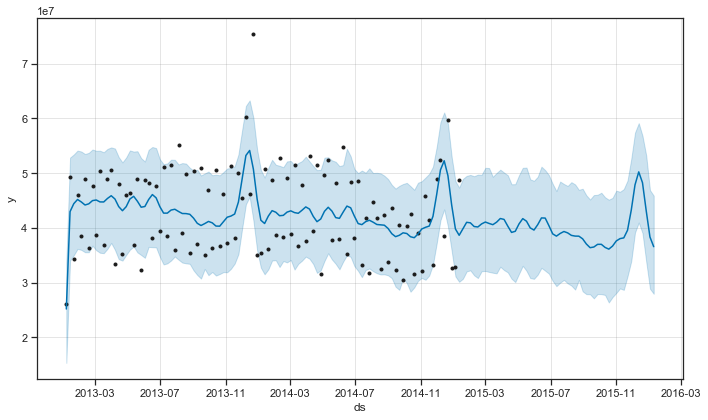

In [118]:
fig1 = prophet.plot(forecast) #plot the results for the forecast time

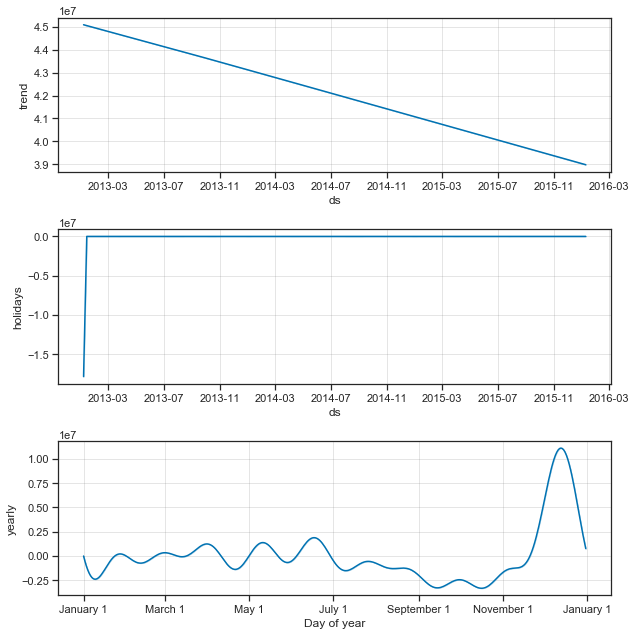

In [119]:
# with this method we can see the components (trend, yearly seasonality and weekly seasonality of the time series.).
fig2 = prophet.plot_components(forecast)

Now I want to see the real truth data and the forecasted data

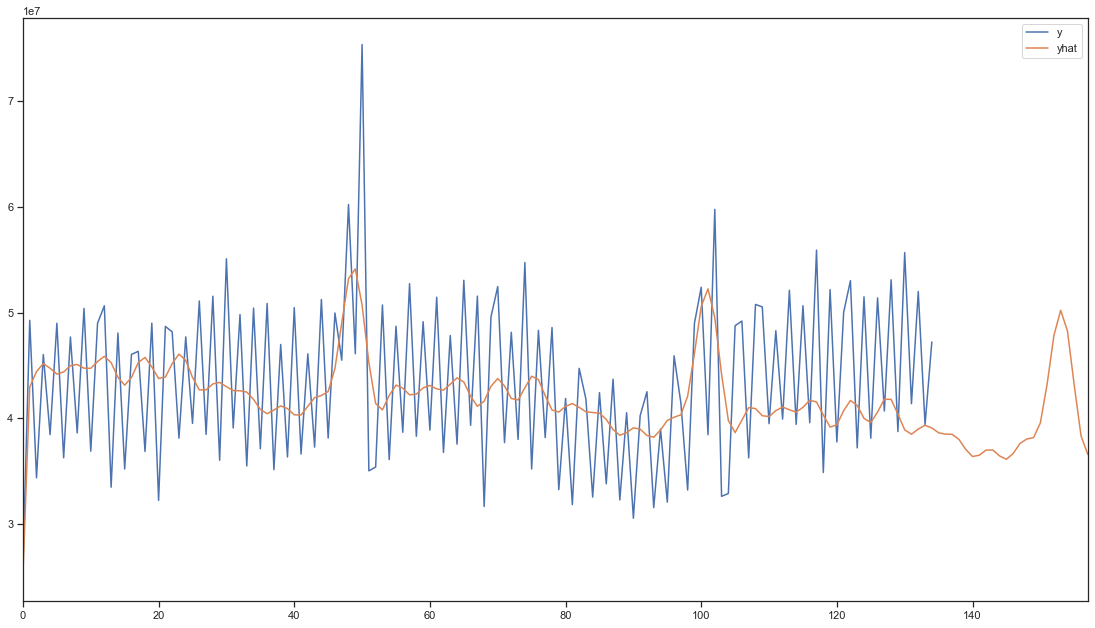

In [124]:
fc_week_prophet = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]] # create a df with only the importan variables
fc_week_prophet = fc_week_prophet.merge(ts_week_prophet, how = "left", on = "ds") #add the original data to the fc frame, so we can compare 
fc_week_prophet = fc_week_prophet.set_index("ds") # make a time series index
fc_week_prophet = fc_week_prophet.reset_index()
fc_week_prophet.head()

plt.figsize=(10,20)
fc_week_prophet["y"].plot(figsize=(17,10))
fc_week_prophet["yhat"].plot()

plt.legend()
plt.show()

## XGBoost

In [126]:
# Loss function
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [168]:
features = ["Store",'DayOfWeek','Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2',
       'CompetitionOpen', 'PromoOpen']
train_store["StateHoliday"] = train_store["StateHoliday"].astype('int64')
train_store["Assortment"] = train_store["Assortment"].astype('int64')
features = train_store[features]
target = train_store['Sales']
train_store.to_csv("data/train_store.csv")

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# I call here train_test_set which is  divided 80% and 20% validation
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675470, 14) (168868, 14) (675470,) (168868,)


In [151]:
import xgboost as xgb

param = {'max_depth':10, # maximum depth of a tree
         "booster": "gbtree",   # use tree based models 
         'eta':1, # learning rate
         'silent':1, # silent mode
         'objective':'reg:linear', # for linear regression
#          "seed": 10,   # Random number seed
#          "subsample": 0.9,    # Subsample ratio of the training instances
        }

num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_train_test, y_train_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)
         
# make prediction
preds = xgboost.predict(dtest)

[09:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:46:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in expm1
  
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in expm1
  
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in expm1
  import sys
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in expm1
  import sys
C:\Users\owner pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


[0]	train-rmse:2307.50415	eval-rmse:2319.71094	train-rmspe:nan	eval-rmspe:nan
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:2197.46973	eval-rmse:2230.26489	train-rmspe:nan	eval-rmspe:nan
[2]	train-rmse:1805.38538	eval-rmse:1836.70154	train-rmspe:nan	eval-rmspe:nan
[3]	train-rmse:1718.65344	eval-rmse:1755.02771	train-rmspe:nan	eval-rmspe:nan
[4]	train-rmse:1410.74158	eval-rmse:1445.59326	train-rmspe:nan	eval-rmspe:nan
[5]	train-rmse:1329.98596	eval-rmse:1375.19287	train-rmspe:nan	eval-rmspe:nan
[6]	train-rmse:1284.32434	eval-rmse:1333.89258	train-rmspe:nan	eval-rmspe:nan
[7]	train-rmse:1255.01453	eval-rmse:1307.58423	train-rmspe:nan	eval-rmspe:nan
[8]	train-rmse:1209.83350	eval-rmse:1262.55835	train-rmspe:nan	eval-rmspe:nan
[9]	train-rmse:1148.93311	eval-rmse:1203.26514	train-rmspe:nan	eval-rmspe:nan
[10]	train-rmse:1117.32031	eval-rmse:1177.71301	train-rmspe:nan	eval-rmspe

In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost)

RMS: 875.1776080302733


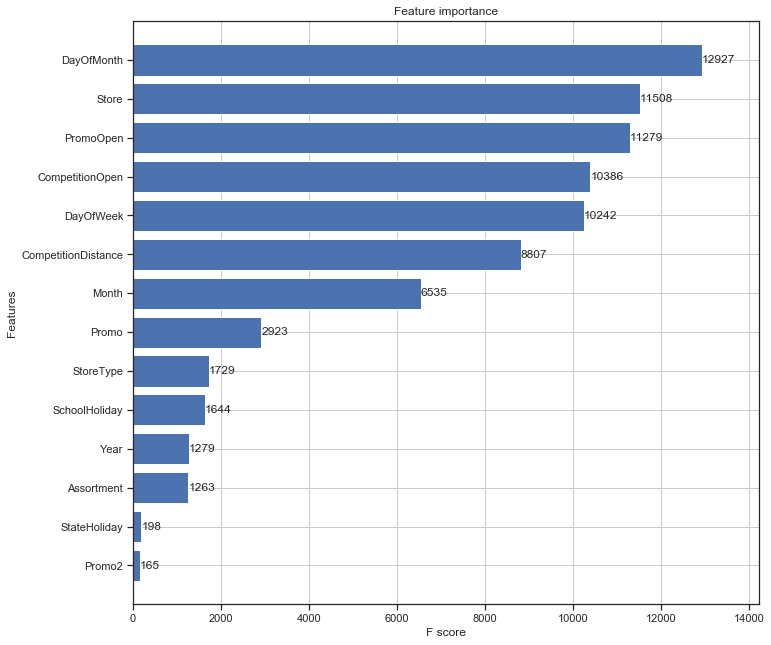

In [154]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [159]:
### let fit with all data
X_train = features
y_train = target

param = {'max_depth':10, # maximum depth of a tree
         "booster": "gbtree",   # use tree based models 
         'eta':1, # learning rate
         'silent':1, # silent mode
         'objective':'reg:linear', # for linear regression
#          "seed": 10,   # Random number seed
#          "subsample": 0.9,    # Subsample ratio of the training instances
        }

num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train, y_train)

xgboost = xgb.train(param, dtrain, num_round, feval=rmspe_xg, verbose_eval=True)

[10:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:01:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
#predictin by given test data
features = ["Store",'DayOfWeek','Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'DayOfMonth',
       'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2',
       'CompetitionOpen', 'PromoOpen']
test_store["StateHoliday"] = train_store["StateHoliday"].astype('int64')
test_store["Assortment"] = train_store["Assortment"].astype('int64')
store_ids = test_store["Id"]
X_test = test_store[features]
dtest = xgb.DMatrix(X_test)


Y_pred = xgboost.predict(dtest)
predictions = pd.Series()
predictions = predictions.append(pd.Series(Y_pred, index=store_ids))

In [162]:
predictions.head()

1        3769.874268
857      4640.372070
1713     5657.698242
2569     7195.940430
3425    11739.541992
dtype: float32

In [161]:
submission = pd.DataFrame({"Id": predictions.index, "Sales": predictions.values})
submission.to_csv("predictions/xgb.csv", index=False)

In [157]:
print("now lets see the scores togher")

model_errors = pd.DataFrame({
    "Model": [ "Random Forest Regression", "XGBoost"],
    "Score": [rms_rfr, rms_xgboost]
})

model_errors.sort_values(by = "Score", ascending = True)

now lets see the scores togher


,Model,Score
1,XGBoost,875.177608
0,Random Forest Regression,979.173224


**From this we can conclude that XGBoost Model performs better**